In [1]:
import os
import sys
import json
sys.path.insert(0, '../..')
from mining import * 
import matplotlib.pyplot as plt

## Histidine

### MS2

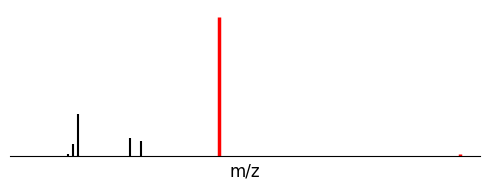

In [32]:
# Raw data as list of tuples (m/z, intensity)
data = [
    (38.962, 0.24), (39.0225, 0.63), (54.0336, 0.83), (56.0488, 3.13),
    (66.031, 0.4), (68.0496, 1.88), (69.0455, 0.29), (81.0446, 2.11),
    (82.0526, 9.05), (82.1031, 0.21), (83.0603, 30.24), (83.0981, 1.37),
    (83.1256, 0.4), (83.3266, 0.18), (92.9085, 0.19), (93.0448, 13.13),
    (93.0853, 0.51), (93.0993, 0.29), (95.0603, 11.1), (95.101, 0.4),
    (95.117, 0.19), (110.0714, 100.0), (110.4159, 0.19), (110.4994, 0.18),
    (110.5624, 0.22), (110.5831, 0.18), (111.0562, 0.33), (121.0419, 0.31),
    (156.0768, 1.56), (156.145, 0.35)
]

match_mz_values = [110.0714, 156.0768]
match_intensities = [100.0, 1.56]

# Filter data to remove peaks with intensity less than 1
filtered_data = [entry for entry in data if entry[1] >= 1]

# Separate the filtered data into mz_values and intensities
mz_values = [entry[0] for entry in filtered_data if entry[0] not in match_mz_values]
intensities = [entry[1] for entry in filtered_data if entry[1] not in match_intensities]



# Plot the MS2 spectra
plt.figure(figsize=(5, 2))
stems1 = plt.stem(mz_values, intensities, basefmt=" ", markerfmt=" ", linefmt="black")
stems1.stemlines.set_linewidth(1.5)
stems2 = plt.stem(match_mz_values, match_intensities, basefmt=" ", markerfmt=" ", linefmt="red")
stems2.stemlines.set_linewidth(2.5)
plt.xlim(70, 160)
plt.ylim(0, max(max(intensities), max(match_intensities)) * 1.05)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.title("MS2 Spectra", fontsize=14)
plt.xlabel("m/z", fontsize=12)
plt.xticks(np.arange(70, 160, 40))
# plt.ylabel("m/z", fontsize=12)
plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()


MTBLS1465_HILICpos__ppm5_3505731

    [
      "F5768",
      156.0768,
      "HISTIDINE",
      [
        [
          110.0714,
          "F21129"
        ]
      ]
    ],

F5768   156.0768	515.69

F21129  110.0713	515.69

## Use mzML file

In [2]:
import pyopenms as oms

exp = oms.MSExperiment()
oms.MzMLFile().load("./CHCL3_20min_B.mzML", exp)

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [5]:
mz, intensity = exp[1408].get_peaks()
log_transformed_intensity = np.log10(intensity)
normalized_intensity = (log_transformed_intensity - np.min(log_transformed_intensity)) / (np.max(log_transformed_intensity) - np.min(log_transformed_intensity)) * 100


In [6]:
def quick_stats(data):
    print("Mean:", np.mean(data))
    print("Median:", np.median(data))
    print("Standard Deviation:", np.std(data))
    print("Variance:", np.var(data))
    print("Minimum:", np.min(data))
    print("Maximum:", np.max(data))
    print("25th Percentile:", np.percentile(data, 25))
    print("75th Percentile:", np.percentile(data, 75))
    print("Sum:", np.sum(data))

quick_stats(normalized_intensity)

Mean: 21.314508
Median: 19.284206
Standard Deviation: 14.990244
Variance: 224.70741
Minimum: 0.0
Maximum: 100.0
25th Percentile: 9.179140329360962
75th Percentile: 29.21060037612915
Sum: 41222.258


In [33]:
target_values = np.array([110.0714, 156.0768])
condition = np.any([abs((mz - target) / mz) <= 1e-6 for target in target_values], axis=0)

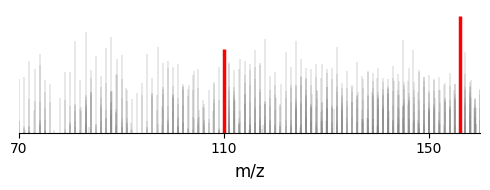

In [34]:
his_mz_values = mz[condition]
his_intensities = normalized_intensity[condition]

mz_values = mz[~condition]
intensities = normalized_intensity[~condition]

plt.figure(figsize=(5, 2))
stems1 = plt.stem(mz_values, intensities, basefmt=" ", markerfmt=" ", linefmt="#7f7f7f", bottom=0.01)
stems1.stemlines.set_linewidth(0.25)
stems2 = plt.stem(his_mz_values, his_intensities, basefmt=" ", markerfmt=" ", linefmt="red", bottom=0.01)
stems2.stemlines.set_linewidth(2.5)
# Set x-axis range
plt.xlim(70, 160)
plt.ylim(0, max(max(intensities), max(his_intensities)) * 1.05)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("m/z", fontsize=12)
plt.xticks(np.arange(70, 160, 40))
plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()